In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime

In [34]:
df1 = pd.read_csv('2023_cleaned.csv')
df2 = pd.read_csv('2022_cleaned.csv')
df3 = pd.read_csv('2021_cleaned.csv')
df = pd.concat([df1,df2,df3])
df.head()

,Unnamed: 0,Sample Time,total
0,0.0,2023-01-01 00:00:00,33.0
1,1.0,2023-01-01 00:05:00,37.0
2,2.0,2023-01-01 00:10:00,36.0
3,3.0,2023-01-01 00:15:00,34.0
4,4.0,2023-01-01 00:20:00,33.0


In [35]:
df.drop('Unnamed: 0',axis = 1, inplace = True)

In [37]:
df.loc[105195, df.columns[0]] = pd.to_datetime('2022-01-01 00:00:00')

In [39]:
df['Sample Time'] = pd.to_datetime(df['Sample Time'], format = 'mixed')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318605 entries, 0 to 108418
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Sample Time  315359 non-null  datetime64[ns]
 1   total        315358 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 15.4 MB


In [40]:
df.describe()

,Sample Time,total
count,315359,315358.000000
mean,2022-07-02 10:15:18.224943360,157.307726
min,2021-01-01 00:00:00,0.000000
25%,2021-10-01 14:47:30,28.000000
50%,2022-07-02 05:50:00,125.000000
75%,2023-04-02 10:52:30,219.000000
max,2023-12-31 23:55:00,924.000000
std,NaN,153.095091


In [41]:
time_range = pd.date_range(start = '2021-01-01 00:00:00', end = '2023-12-31 23:55:00', freq = '5min')
time_range[:10]

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 00:05:00',
               '2021-01-01 00:10:00', '2021-01-01 00:15:00',
               '2021-01-01 00:20:00', '2021-01-01 00:25:00',
               '2021-01-01 00:30:00', '2021-01-01 00:35:00',
               '2021-01-01 00:40:00', '2021-01-01 00:45:00'],
              dtype='datetime64[ns]', freq='5T')

In [54]:
df.set_index(np.arange(len(df)), inplace=True)
df.head()

,Sample Time,total
0,2023-01-01 00:00:00,33.0
1,2023-01-01 00:05:00,37.0
2,2023-01-01 00:10:00,36.0
3,2023-01-01 00:15:00,34.0
4,2023-01-01 00:20:00,33.0


In [67]:
df[~df['Sample Time'].isin(time_range)]

,Sample Time,total


In [62]:
df.dropna(inplace = True)

In [63]:
df.sort_values('Sample Time', inplace=True)

In [71]:
temp = pd.Series(time_range)
values = temp[~temp.isin(df['Sample Time'])]
df = pd.concat([df, pd.DataFrame(list(zip(values, np.full((len(values),1), np.NaN))), columns = df.columns)])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 315528 entries, 210186 to 169
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Sample Time  315528 non-null  datetime64[ns]
 1   total        315528 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 7.2+ MB


In [75]:
df.sort_values(['Sample Time'], inplace = True, ascending=True)
df.set_index(np.arange(len(df)), inplace = True)
df.to_csv('traffic_data.csv')

In [2]:
data = pd.read_csv('traffic_data.csv', index_col=0)
data.set_index('Sample Time', inplace=True)
data = pd.Series(data['total'], index=data.index)
data.head()

C:\Users\MADHU SIDDHARTH S\AppData\Local\Temp\ipykernel_11764\3637333514.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('traffic_data.csv', index_col=0)


Sample Time
2021-01-01 00:00:00    10.0
2021-01-01 00:05:00     8.0
2021-01-01 00:10:00     4.0
2021-01-01 00:15:00     6.0
2021-01-01 00:20:00    12.0
Name: total, dtype: object

In [65]:
def traffic_graph(start_time, end_time):
    selected_data = data[(data.index >= start_time) & (data.index < end_time)]
    fig, ax = plt.subplots(figsize=(10,5))
    plt.plot(selected_data, linewidth = 0.5, color='green')
    xticks = pd.date_range(start = selected_data.index.min(), end = selected_data.index.max(), freq = 'D')
    xticks = xticks.date
    color = ['red' if x.weekday() == 6 else 'black' for x in xticks]
    count = (pd.to_datetime(end_time) - pd.to_datetime(start_time)).days
    plt.xticks(list(np.arange(0,len(selected_data), len(selected_data)/count)), xticks, rotation = 45, ha = 'left')
    [t.set_color(i) for (i,t) in zip(color,ax.xaxis.get_ticklabels())]
    plt.yticks(list(np.arange(0,200,20)), list(np.arange(0,200,20)))
    plt.xlabel('Date')
    plt.ylabel('Traffic count')
    plt.title('Weekly Traffic')
    plt.show()

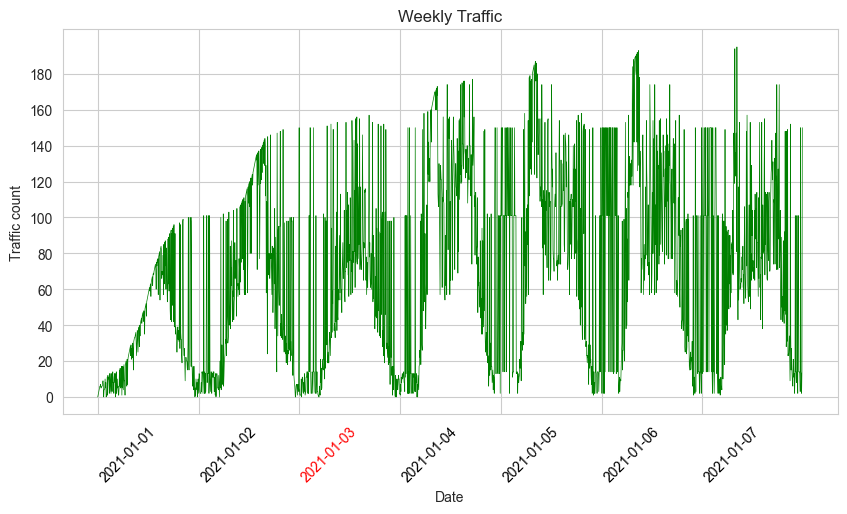

In [66]:
traffic_graph('2021-01-01 00:00:00', '2021-01-08 00:00:00')

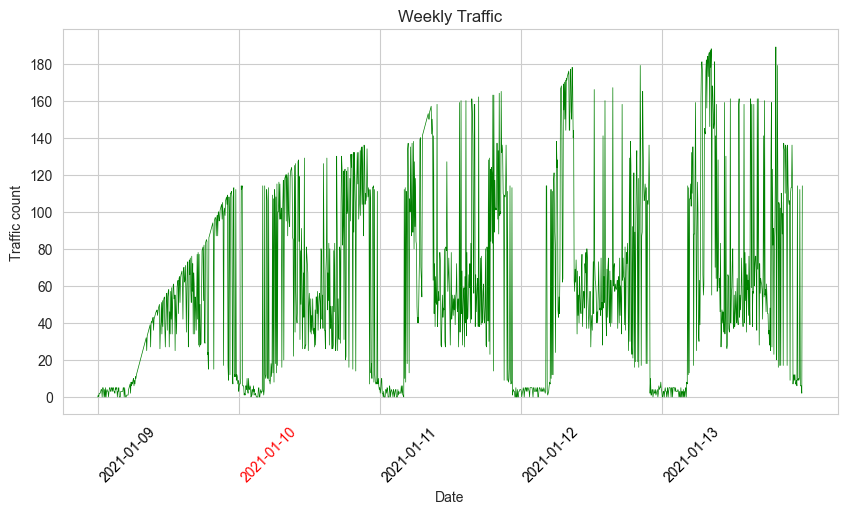

In [69]:
traffic_graph('2021-01-09 00:00:00', '2021-01-14 00:00:00')

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11696684115815899763
xla_global_id: -1
]


In [4]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [2]:
df = pd.read_csv('data.csv')
df.sort_values(['Sample Time'], inplace=True, ascending=True)
df.head()

,Sample Time,1212480 Lane 1 Flow,1212480 Lane 2 Flow,1212480 Lane 3 Flow,day_of_week,day1,day2,day3,day4,day5,...,minute15,minute20,minute25,minute30,minute35,minute40,minute45,minute50,minute55,total
101348,01-01-2021 00:00,1,6,3,5,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,10
101349,01-01-2021 00:05,0,3,5,5,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8
101350,01-01-2021 00:10,0,2,2,5,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4
101351,01-01-2021 00:15,1,5,0,5,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,6
101352,01-01-2021 00:20,1,9,2,5,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,12


([<matplotlib.axis.XTick at 0x27cebd4b350>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

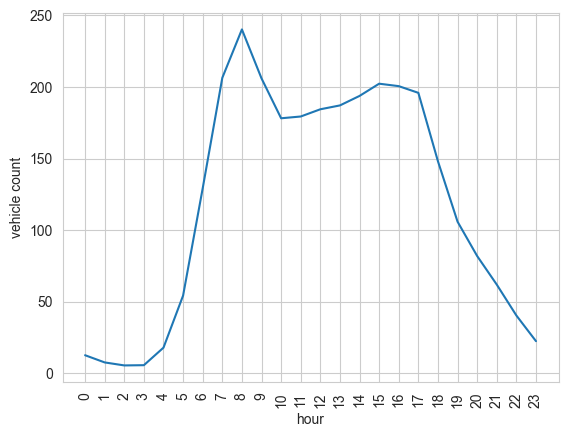

In [7]:
plt.plot(df.groupby(['hour']).agg({'total':'mean'}))
plt.xlabel('hour')
plt.ylabel('vehicle count')
plt.xticks(np.arange(24), np.arange((24)), rotation = 90)

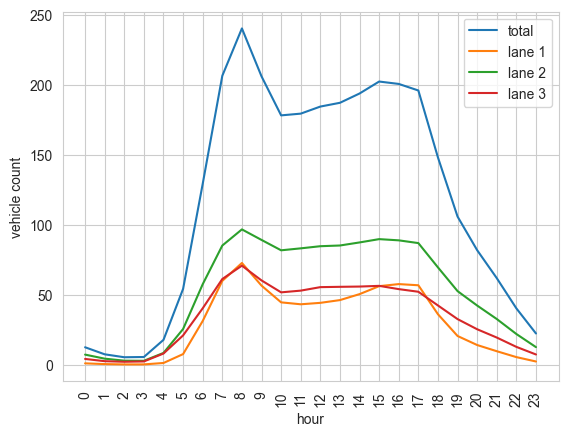

In [10]:
plt.plot(df.groupby(['hour']).agg({'total':'mean', '1212480 Lane 1 Flow':'mean', '1212480 Lane 2 Flow':'mean', '1212480 Lane 3 Flow':'mean'}), label = ['total','lane 1','lane 2','lane 3'])
plt.xlabel('hour')
plt.ylabel('vehicle count')
plt.xticks(np.arange(24), np.arange((24)), rotation = 90)
plt.legend()

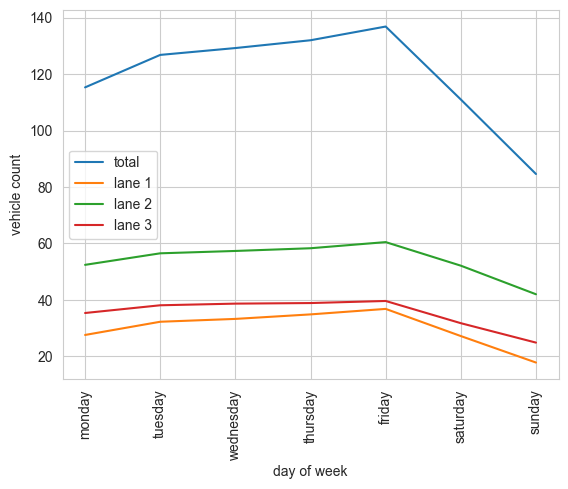

In [19]:
plt.plot(df.groupby(['day_of_week']).agg({'total':'mean', '1212480 Lane 1 Flow':'mean', '1212480 Lane 2 Flow':'mean', '1212480 Lane 3 Flow':'mean'}), label = ['total','lane 1','lane 2','lane 3'])
plt.xlabel('day of week')
plt.ylabel('vehicle count')
plt.xticks(np.arange(1,8), ['monday','tuesday','wednesday','thursday','friday','saturday','sunday'], rotation = 90)
plt.legend()

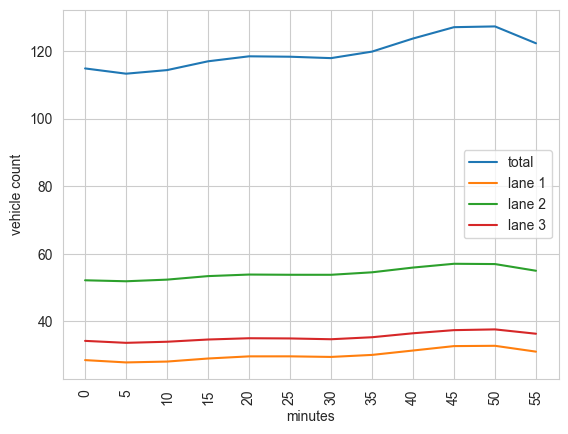

In [20]:
plt.plot(df.groupby(['minute']).agg({'total':'mean', '1212480 Lane 1 Flow':'mean', '1212480 Lane 2 Flow':'mean', '1212480 Lane 3 Flow':'mean'}), label = ['total','lane 1','lane 2','lane 3'])
plt.xlabel('minutes')
plt.ylabel('vehicle count')
plt.xticks(np.arange(0,60,5), np.arange(0,60,5), rotation = 90)
plt.legend()

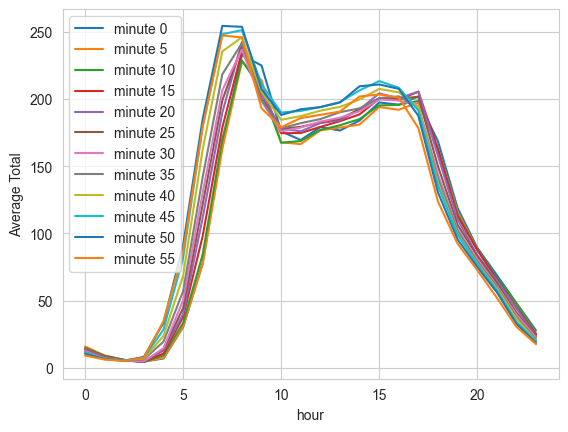

In [32]:
grouped_data = df.groupby(['minute','hour']).agg({'total': 'mean'})
unique_minute = grouped_data.index.get_level_values('minute').unique()

for m in unique_minute:
    m_data = grouped_data.loc[m]
    plt.plot(m_data.index.get_level_values('hour'), m_data['total'], label = f'minute {m}')

plt.xlabel('hour')
plt.ylabel('Average Total')
plt.legend()
plt.show()

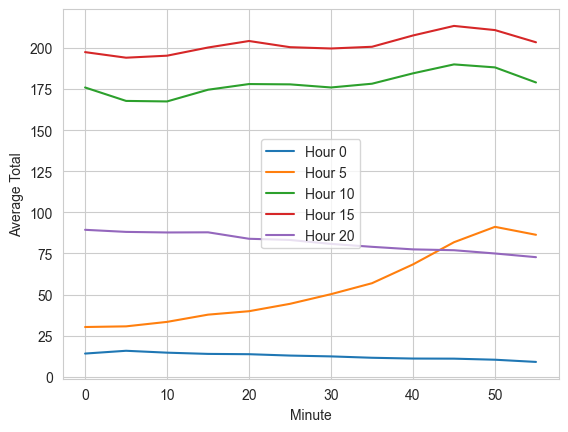

In [34]:
grouped_data = df.groupby(['hour', 'minute']).agg({'total': 'mean'})
for hour in np.arange(0,25,5):
    hour_data = grouped_data.loc[hour]
    plt.plot(hour_data.index.get_level_values('minute'), hour_data['total'], label=f'Hour {hour}')

plt.xlabel('Minute')
plt.ylabel('Average Total')
plt.legend()
plt.show()

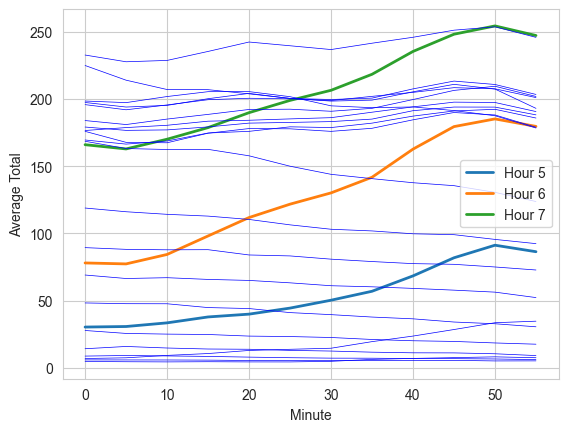

In [42]:
grouped_data = df.groupby(['hour', 'minute']).agg({'total': 'mean'})
unique_hour = grouped_data.index.get_level_values('hour').unique()
for hour in unique_hour:
    hour_data = grouped_data.loc[hour]
    if (hour_data['total'].max() - hour_data['total'].min()) > 50:
        plt.plot(hour_data.index.get_level_values('minute'), hour_data['total'], label=f'Hour {hour}', linewidth = 2)
    else:
        plt.plot(hour_data.index.get_level_values('minute'), hour_data['total'], color = 'blue', linewidth = 0.5)

plt.xlabel('Minute')
plt.ylabel('Average Total')
plt.legend()
plt.show()